<a href="https://colab.research.google.com/github/Sanjar-prog/Telegram-JavaScript-Bot/blob/main/Decision_Tree_algoritmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
#Import the metrics module
from sklearn import metrics # Importing the metrics module from sklearn
# %%
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
# %%
df.sample(10)
# %%
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP']=encoder.fit_transform(df['BP'].values)
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)
# %%
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]
# %%
y = df['Drug'].values
# %% [markdown]
# Train/test split
# %%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
# %% [markdown]
# Model
# %%
tree_model = DecisionTreeClassifier

In [25]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [26]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
6,49,F,NORMAL,HIGH,16.275,drugY
29,45,M,LOW,HIGH,17.951,drugY
87,69,M,LOW,HIGH,15.478,drugY
38,39,F,NORMAL,NORMAL,9.709,drugX
169,20,F,HIGH,HIGH,11.262,drugA
40,73,F,NORMAL,HIGH,19.221,drugY
199,40,F,LOW,NORMAL,11.349,drugX
153,72,F,LOW,NORMAL,14.642,drugX
11,34,F,HIGH,NORMAL,19.199,drugY
68,54,M,NORMAL,HIGH,24.658,drugY


In [27]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP']=encoder.fit_transform(df['BP'].values)
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
139,69,0,2,0,10.065,drugX
151,68,1,0,0,11.009,drugB
52,62,1,1,1,27.183,drugY
69,18,0,0,1,24.276,drugY
4,61,0,1,0,18.043,drugY
144,39,1,0,0,9.664,drugA
8,60,1,2,0,15.171,drugY
41,58,0,0,1,14.239,drugB
108,72,1,0,1,9.677,drugB
196,16,1,1,0,12.006,drugC


In [28]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [29]:
y = df['Drug'].values

Train/test split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

Model

In [31]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

Baholash

In [32]:
y_predict = tree_model.predict(x_test)

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [38]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.7375


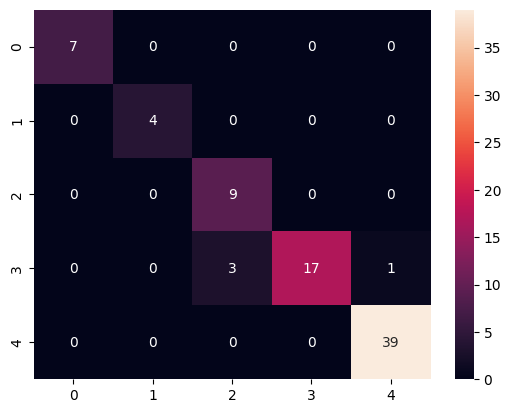

In [14]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [15]:
predict = cross_val_predict(estimator=tree_model, X=X, y=y, cv = 5)
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



Decision Tree chizamiz

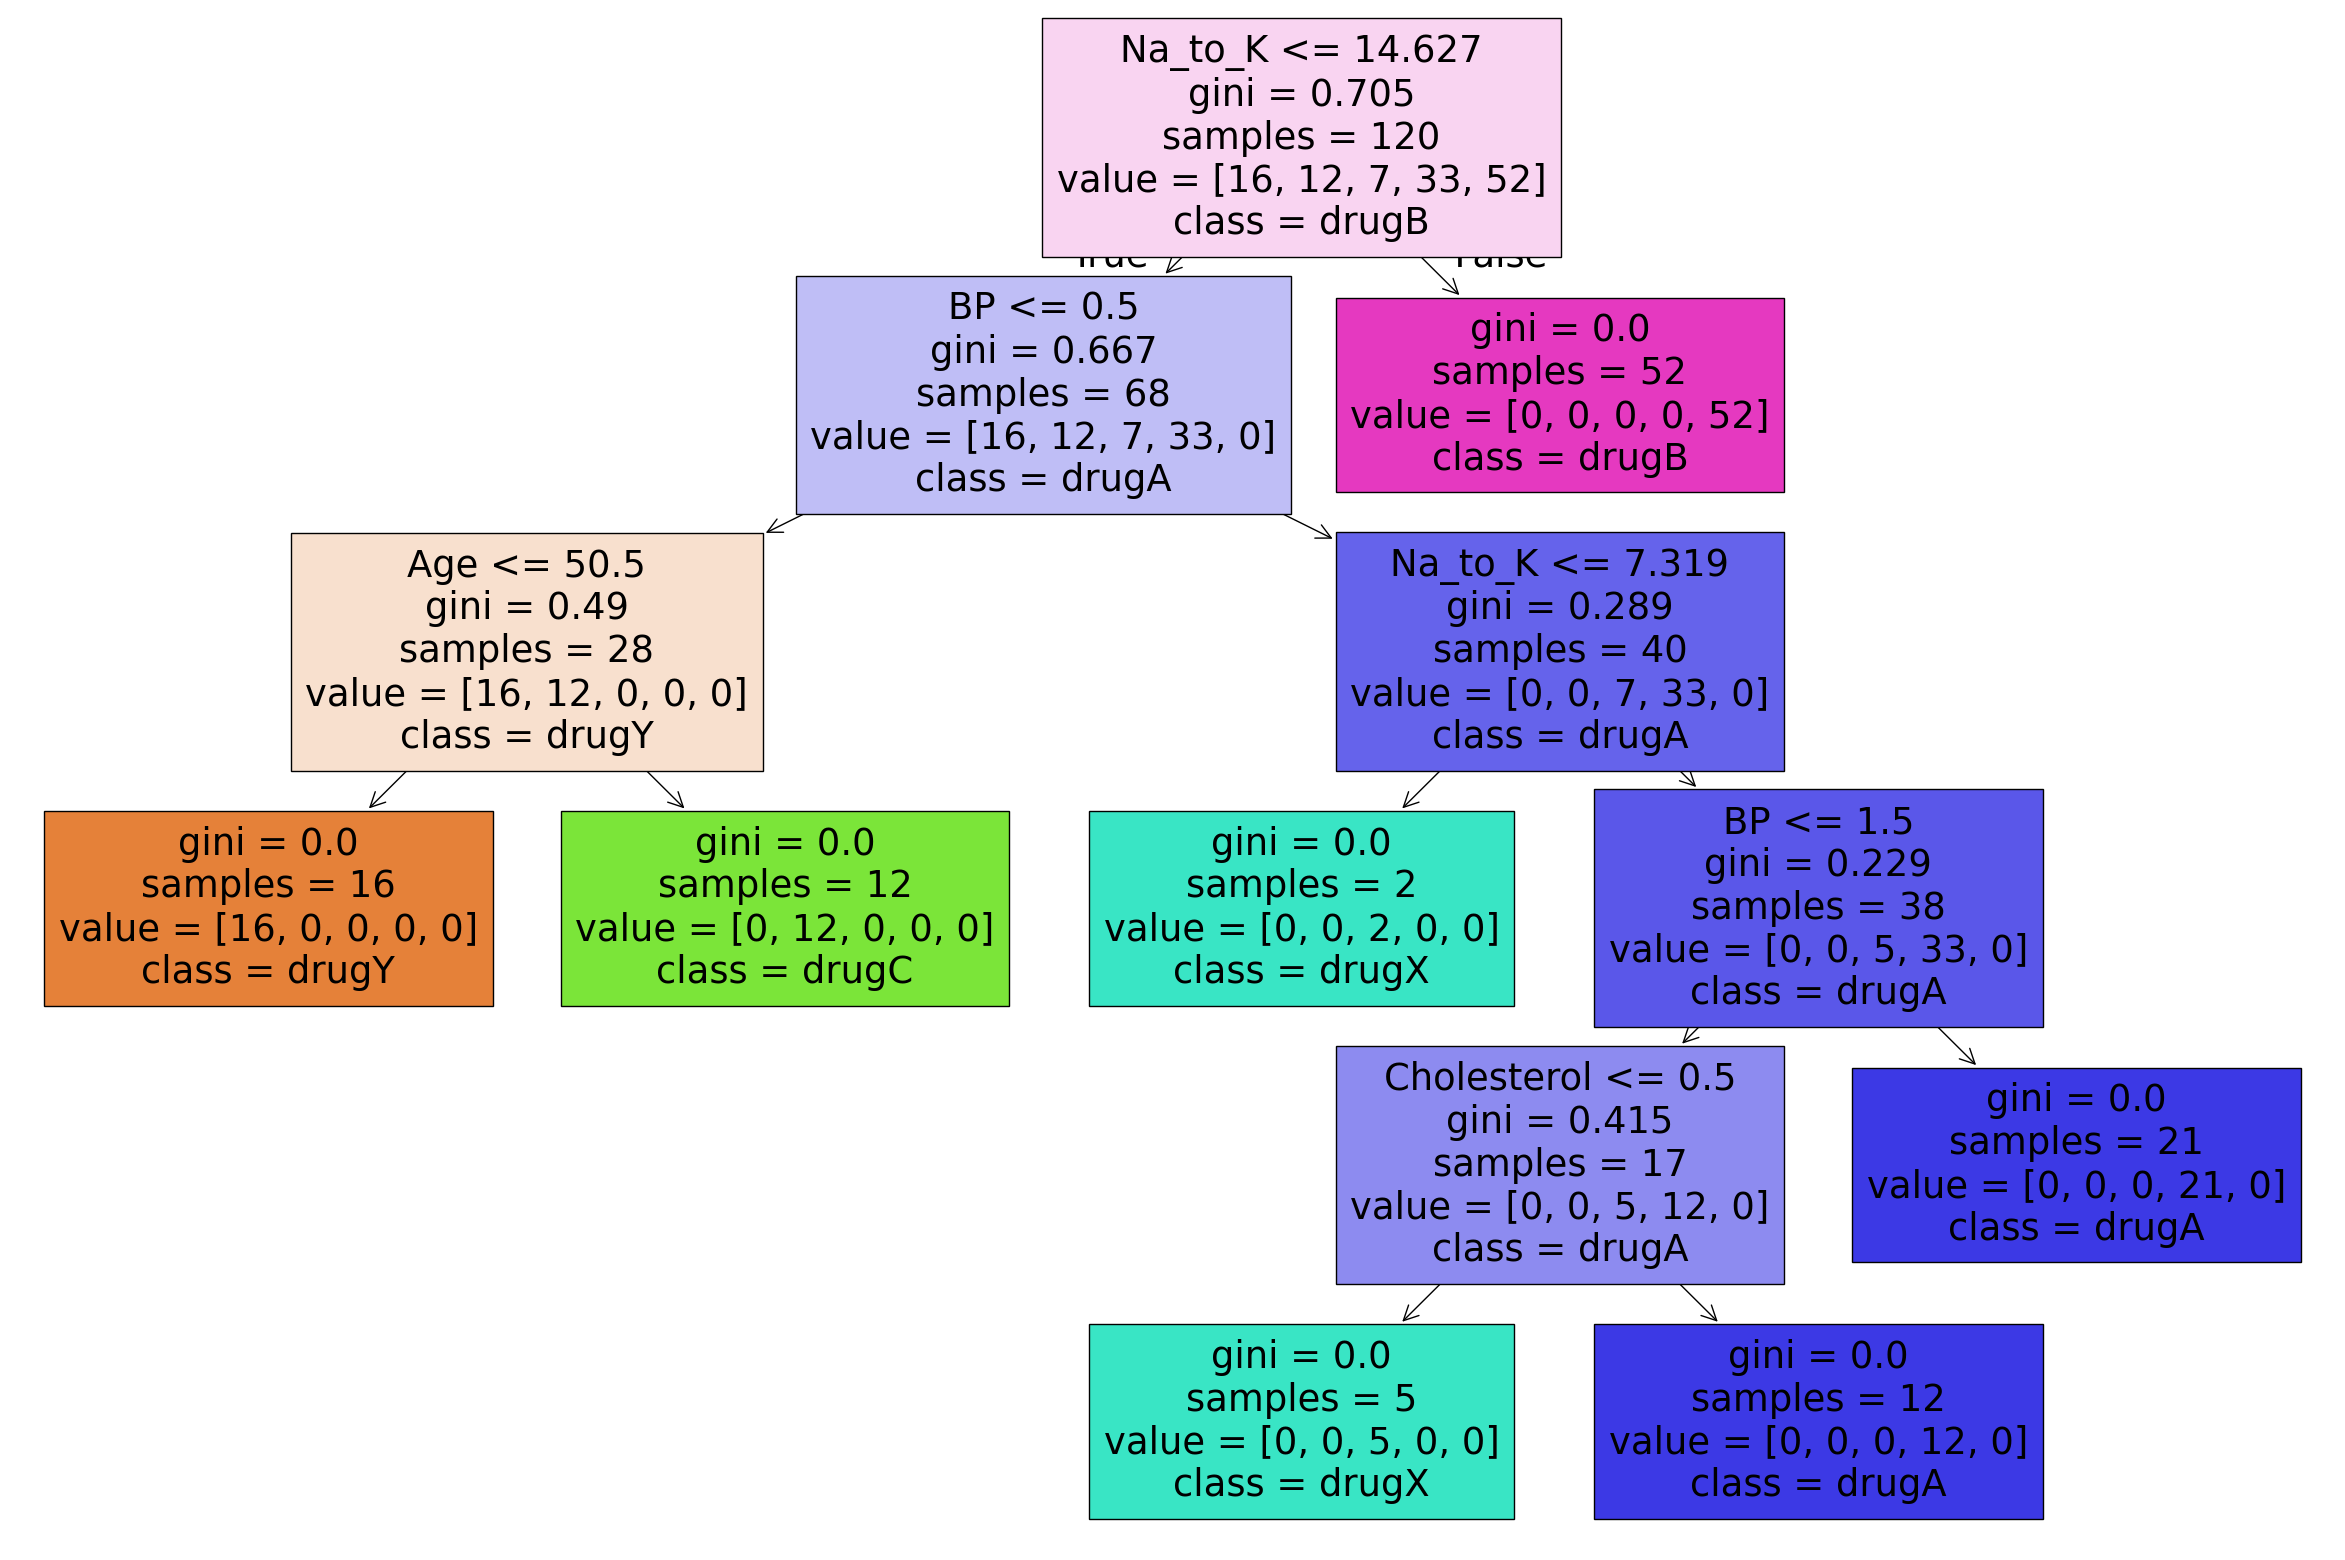

In [16]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.7375


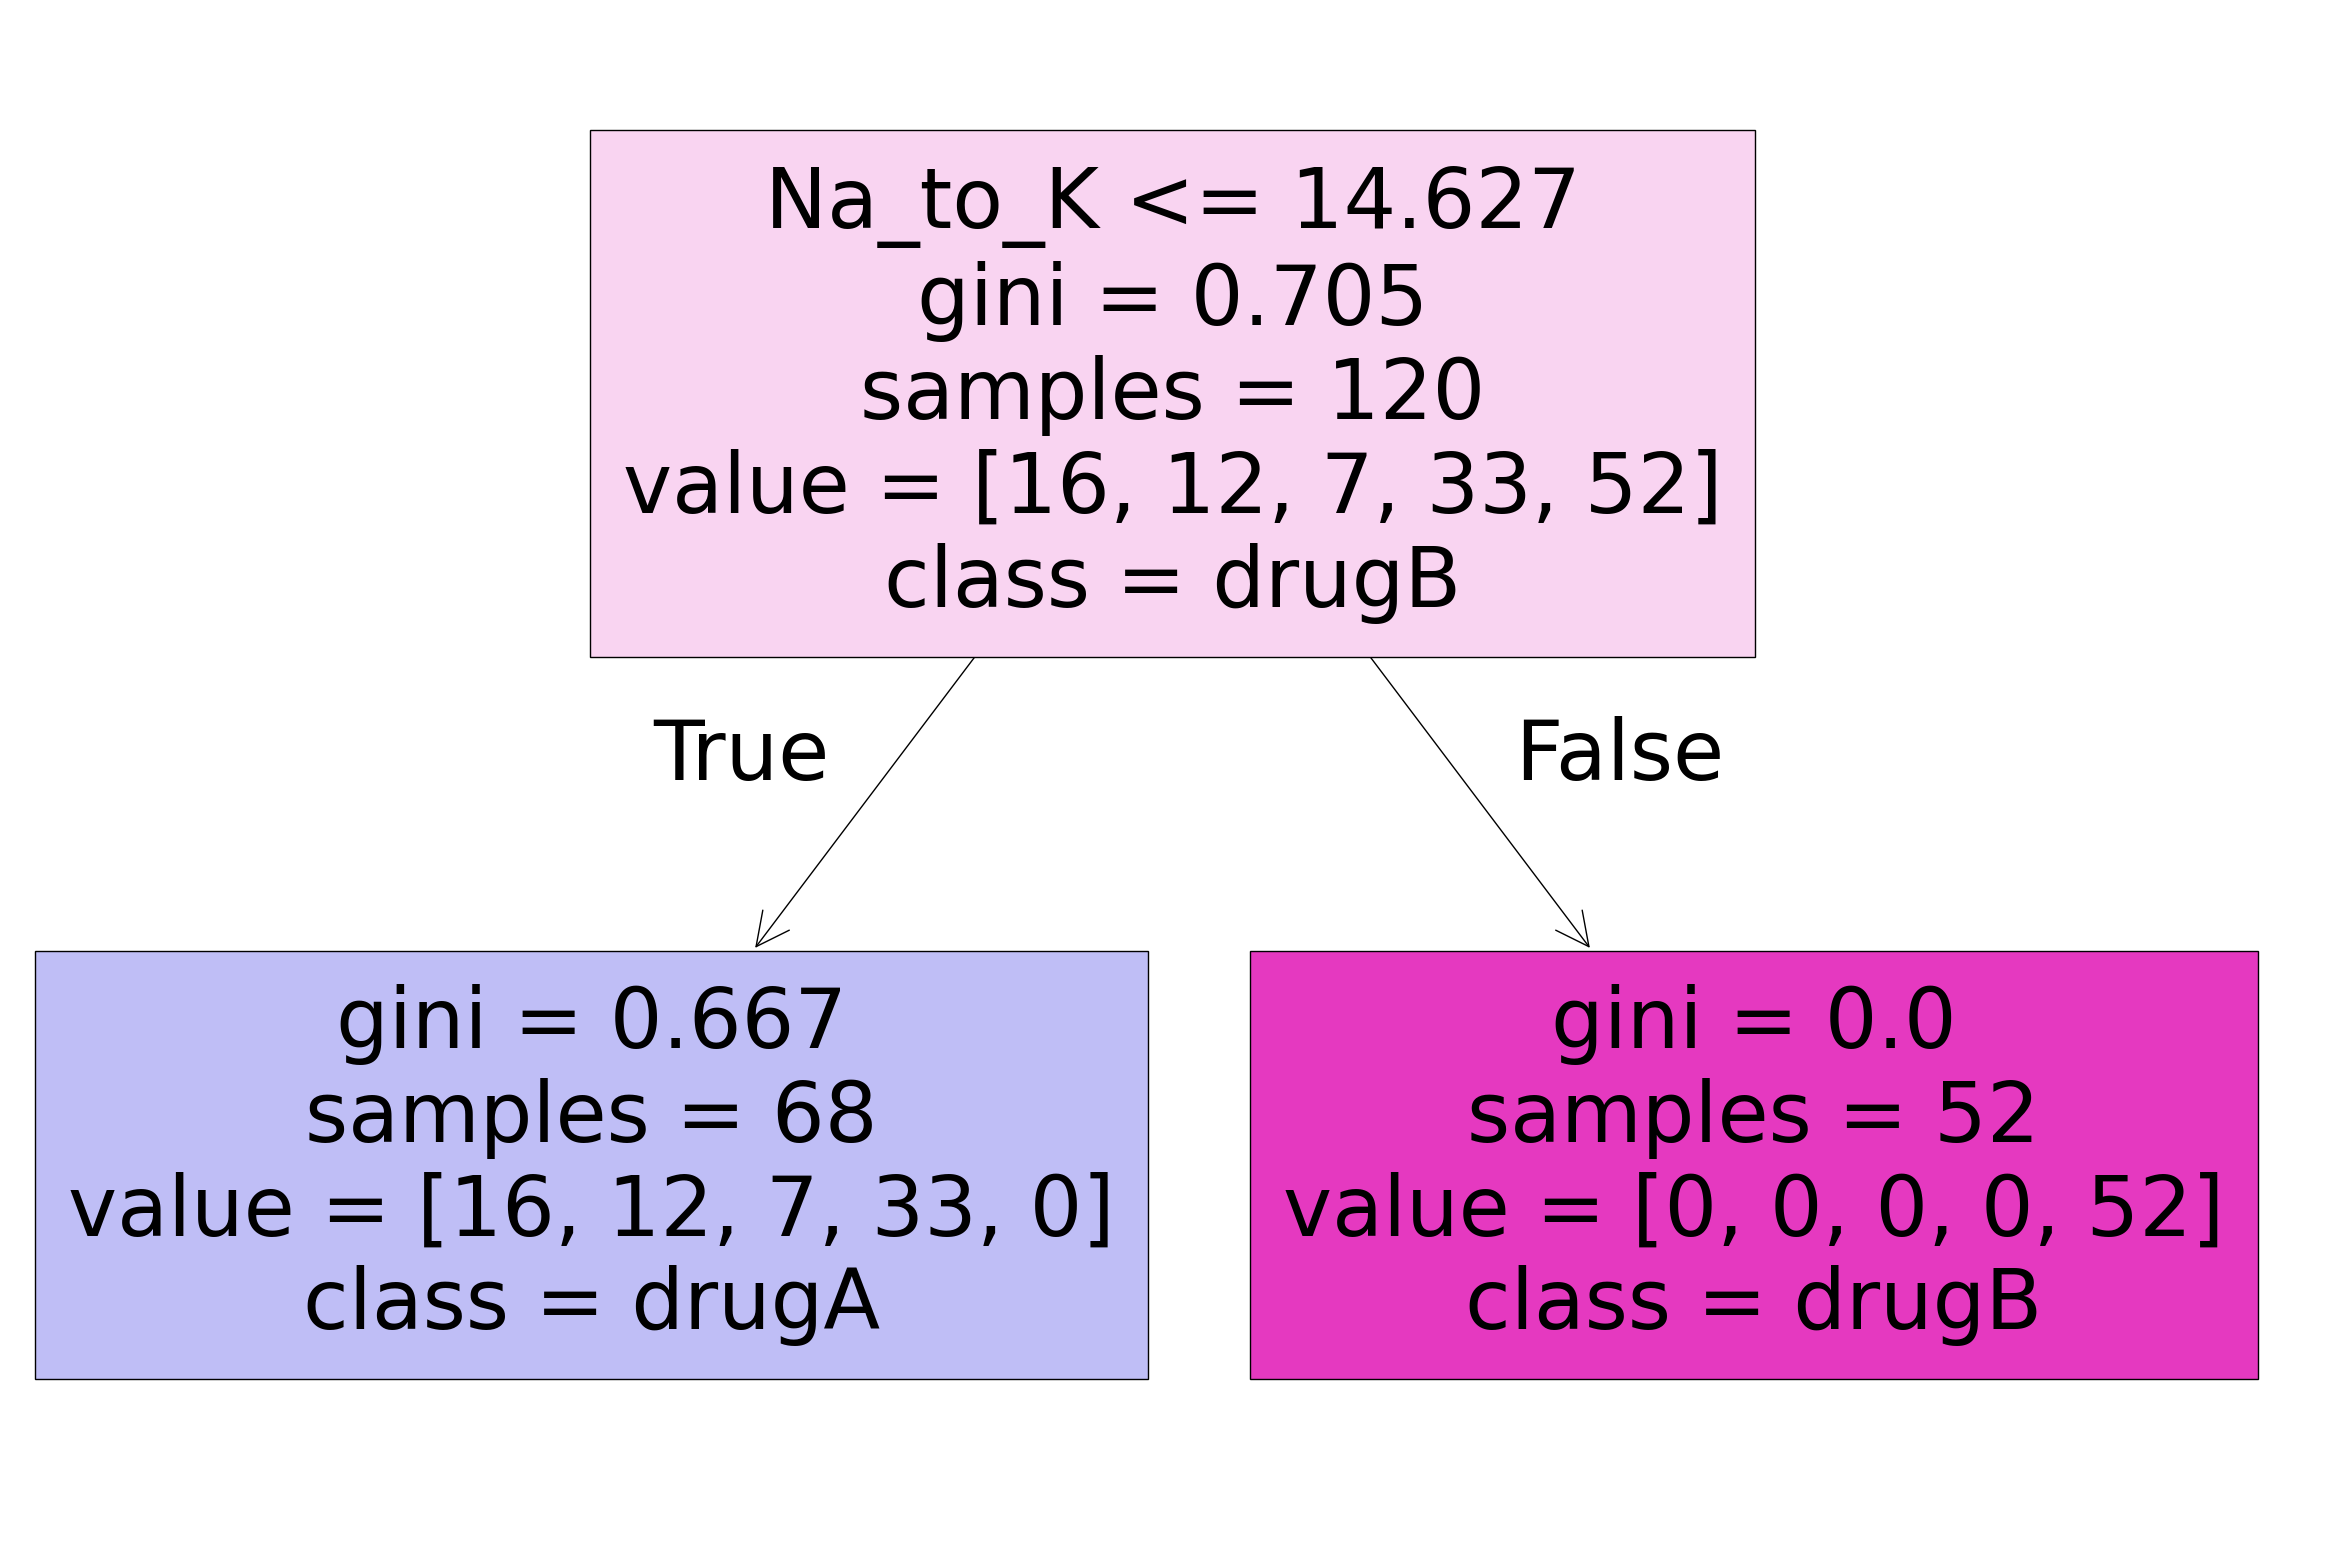

In [39]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.2)
tree_model.fit(x_train, y_train)
y_predict = tree_model.predict(x_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

max_depth - shajara qavatlari soni

DecisionTrees's Accuracy:  0.8375


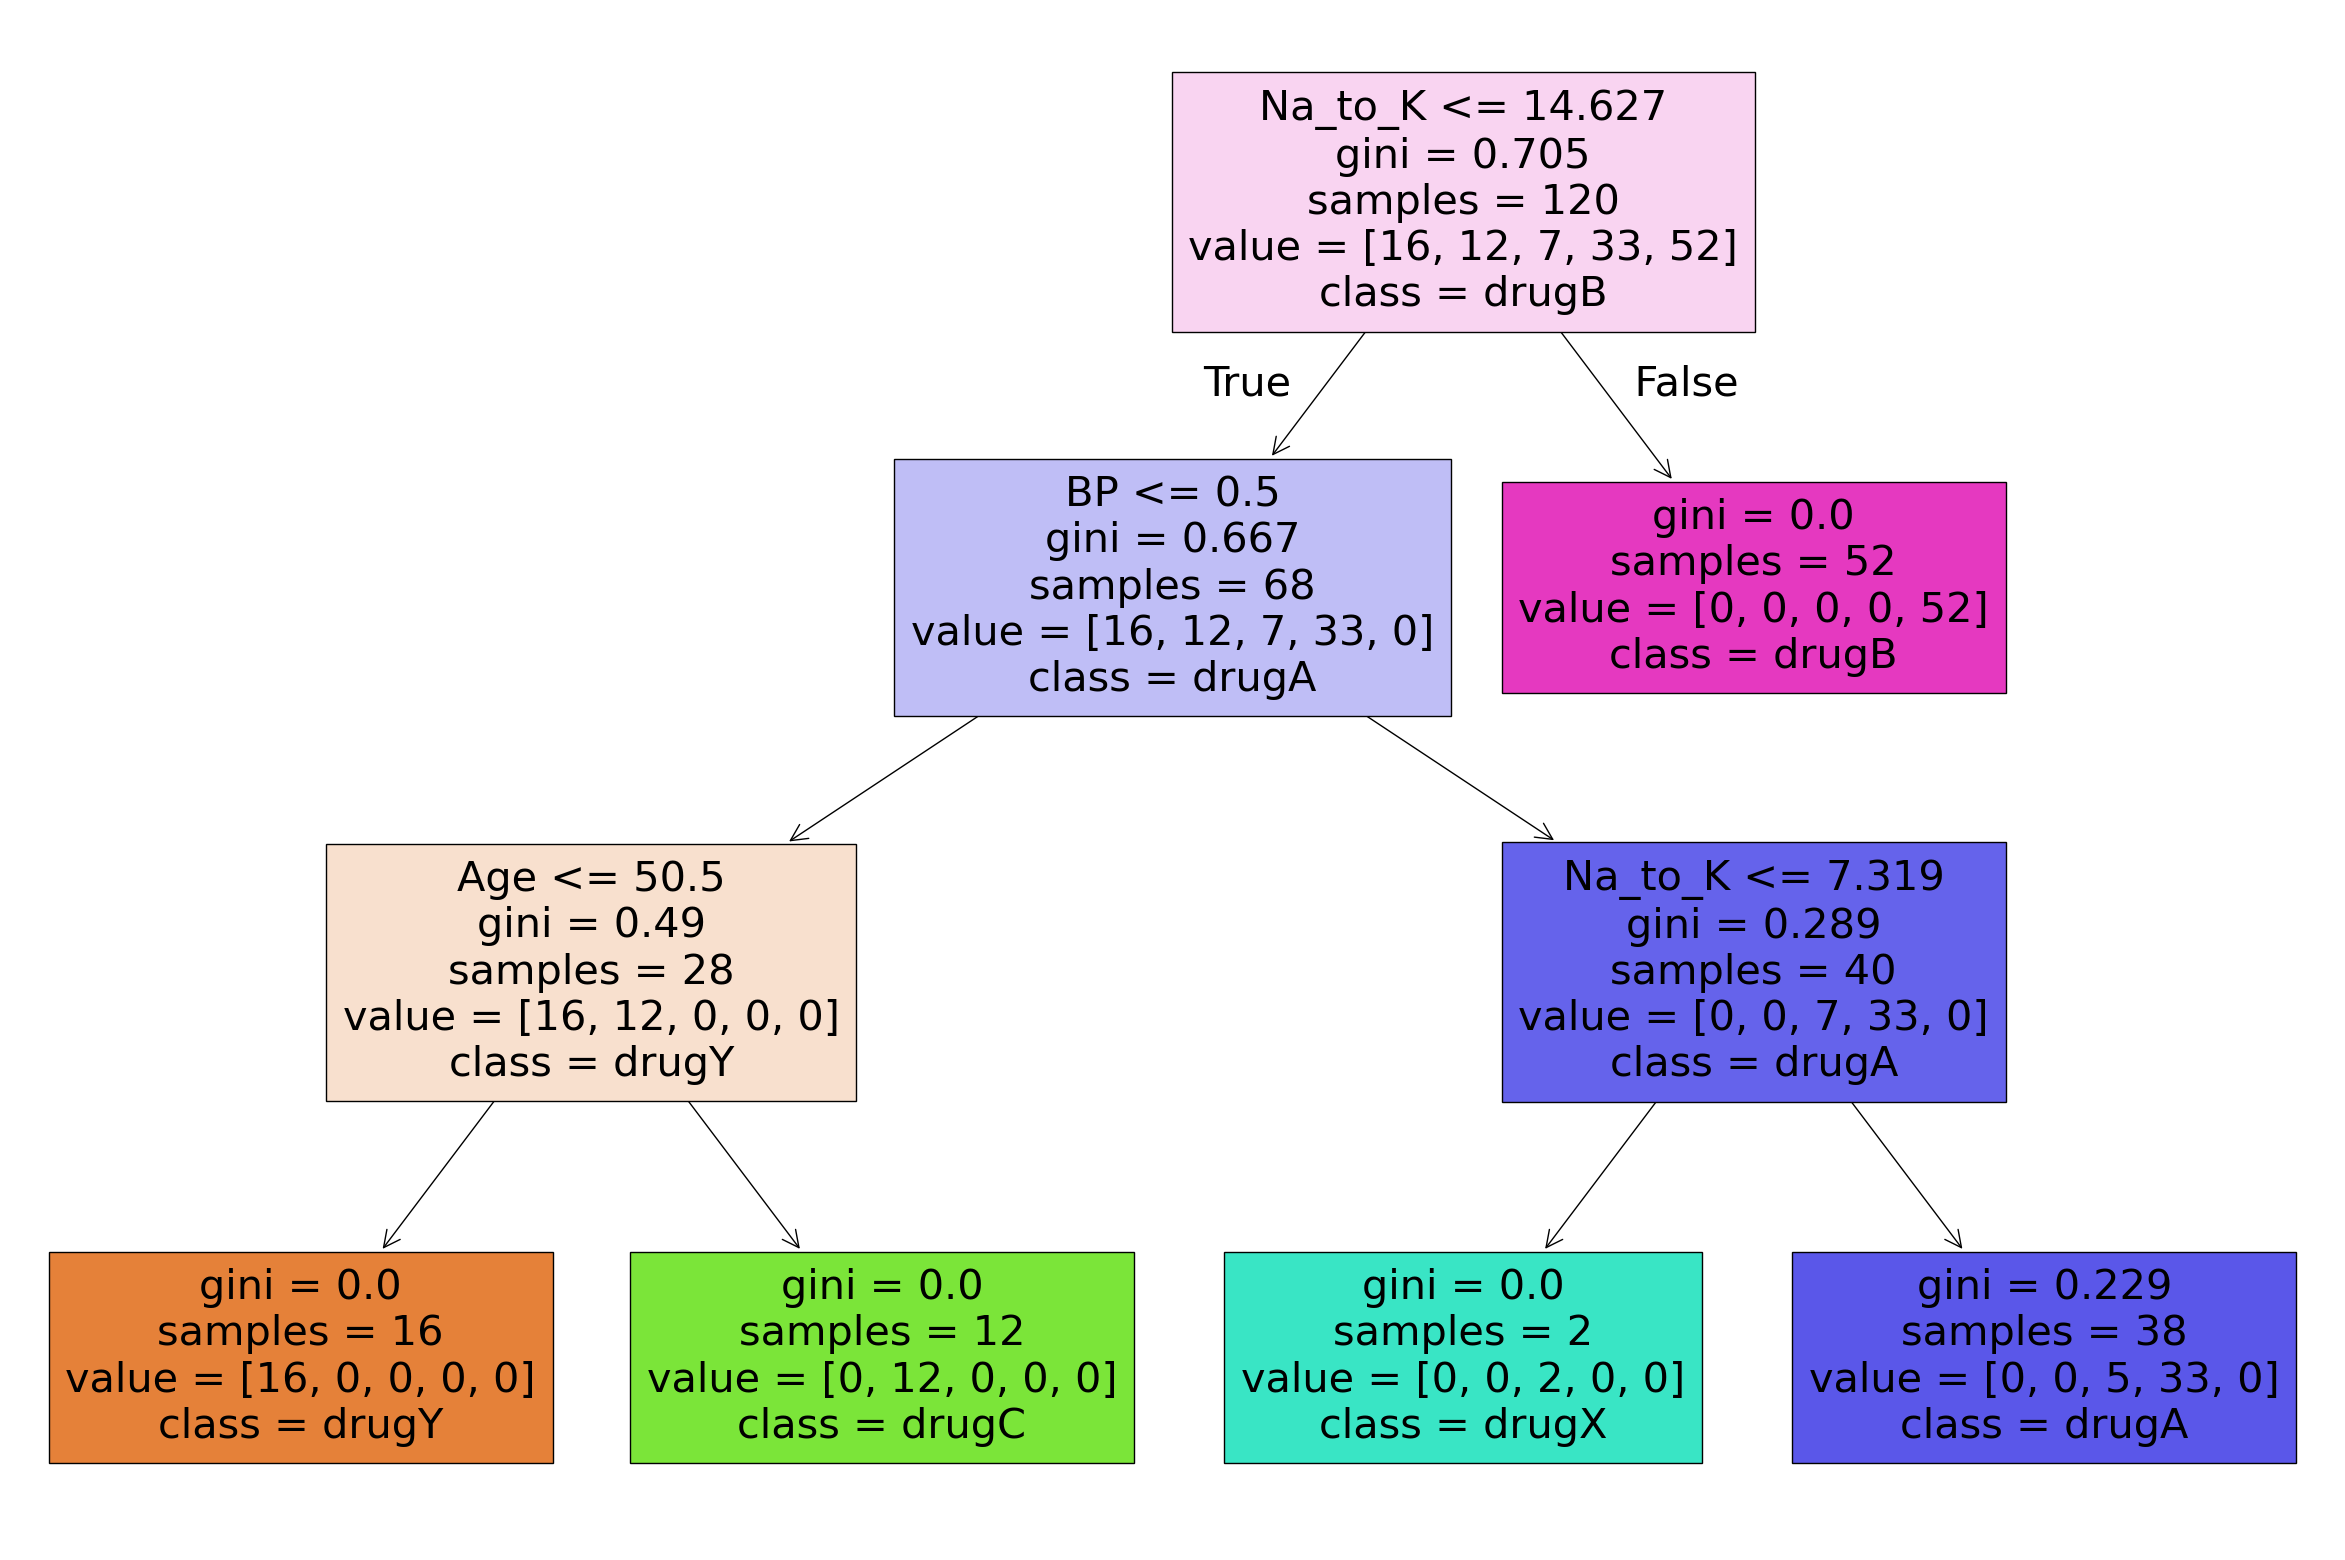

In [29]:
# Train/test split code block
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics # Importing the metrics module from sklearn
import matplotlib.pyplot as plt # Importing pyplot for plotting with alias plt
from sklearn import tree # Importing tree from sklearn for tree visualizations


# Assuming 'X' and 'y' are already defined containing your data and target variables
# ----> Define X and y before using them in train_test_split
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP']=encoder.fit_transform(df['BP'].values)
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'].values)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values
# ---->
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

#Then the model:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(x_train, y_train)
y_predict = tree_model.predict(x_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

# Define cols and classes before using them in plot_tree
cols = df.drop('Drug', axis=1).columns  # Define cols here
classes = df['Drug'].unique()           # Define classes here

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

min_smaples_leaf

DecisionTrees's Accuracy:  0.875


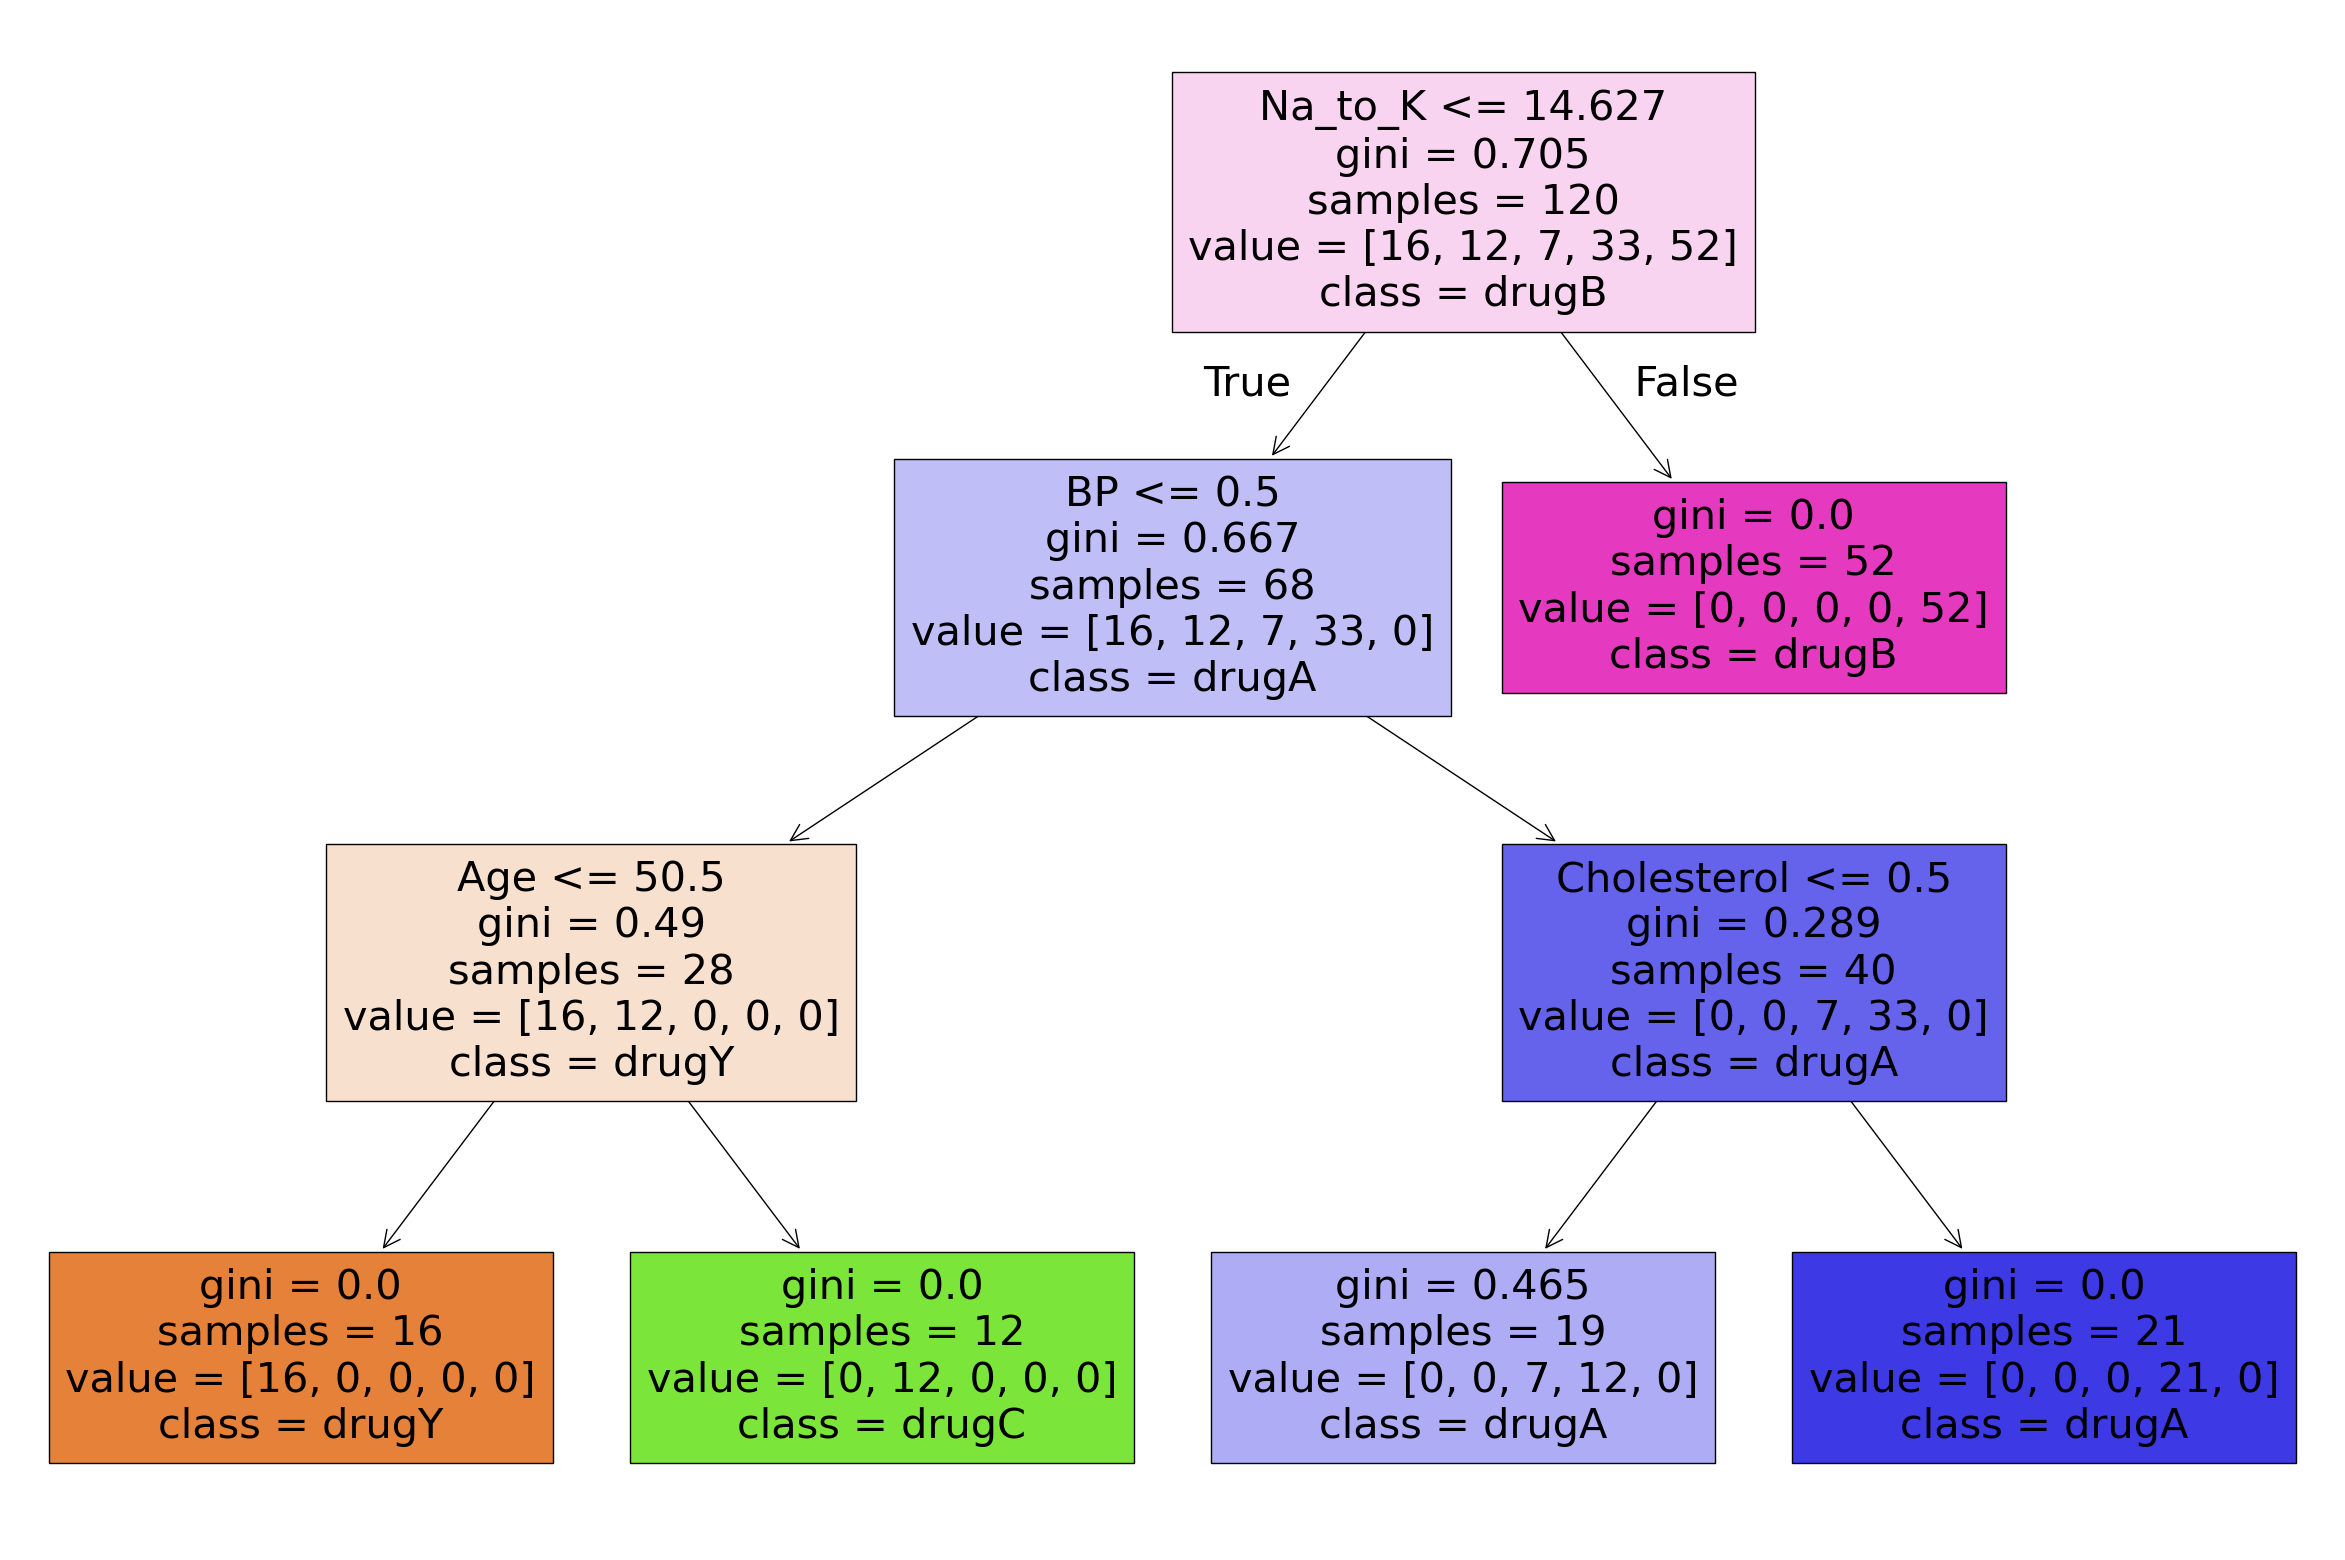

In [30]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(x_train, y_train) # Changed X_train to x_train
y_predict = tree_model.predict(x_test) # Changed X_test to x_test
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import classification_report # Import classification_report

rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(x_train, y_train)
y_predict = rf_model.predict(x_test)
print((classification_report(y_test, y_predict)))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.78      0.88         9
       drugX       0.91      0.95      0.93        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.96        80
   macro avg       0.98      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [32]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import classification_report # Import classification_report
from sklearn import metrics # Importing the metrics module from sklearn

rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(x_train, y_train)
y_predict = rf_model.predict(x_test)
print((classification_report(y_test, y_predict)))

print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.89      0.94         9
       drugX       0.95      0.95      0.95        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.97        80
   macro avg       0.99      0.97      0.98        80
weighted avg       0.98      0.97      0.97        80

Random Forest's Accuracy:  0.975
